𝗧𝗮𝘀𝗸: Write a solution to find the daily active user count for a period of 30 days ending 2019-07-27 inclusively. A user was active on someday if they made at least one activity on that day.

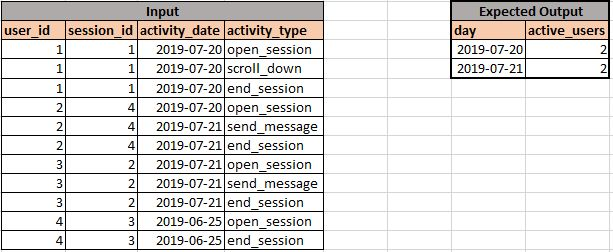

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('challenges').getOrCreate()

In [3]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

data = [
 (1,1,'2019-07-20 ','open_session'),
 (1,1,'2019-07-20 ','scroll_down'),
 (1,1,'2019-07-20 ','end_session'),
 (2,4,'2019-07-20 ','open_session'),
 (2,4,'2019-07-21 ','send_message'),
 (2,4,'2019-07-21 ','end_session'),
 (3,2,'2019-07-21 ','open_session'),
 (3,2,'2019-07-21 ','send_message'),
 (3,2,'2019-07-21 ','end_session'),
 (4,3,'2019-06-25 ','open_session'),
 (4,3,'2019-06-25 ','end_session') 
]

schema = StructType([
 StructField("user_id",IntegerType(),True),
 StructField("session_id",IntegerType(),True),
 StructField("activity_date",StringType(),True),
 StructField("activity_type",StringType(),True)
])

df = spark.createDataFrame(data,schema)
df.show()

+-------+----------+-------------+-------------+
|user_id|session_id|activity_date|activity_type|
+-------+----------+-------------+-------------+
|      1|         1|  2019-07-20 | open_session|
|      1|         1|  2019-07-20 |  scroll_down|
|      1|         1|  2019-07-20 |  end_session|
|      2|         4|  2019-07-20 | open_session|
|      2|         4|  2019-07-21 | send_message|
|      2|         4|  2019-07-21 |  end_session|
|      3|         2|  2019-07-21 | open_session|
|      3|         2|  2019-07-21 | send_message|
|      3|         2|  2019-07-21 |  end_session|
|      4|         3|  2019-06-25 | open_session|
|      4|         3|  2019-06-25 |  end_session|
+-------+----------+-------------+-------------+



In [4]:
end_date = "2019-07-27"
start_date = date_sub(end_date, 30)

In [5]:
filtered_df = df.filter((col("activity_date") >= start_date) & (col("activity_date") <= end_date))

# Group by activity_date and user_id, then count distinct users
daily_active_users = filtered_df.groupBy("activity_date").agg(countDistinct("user_id").alias("active_users"))

# Show the result
daily_active_users.show()

+-------------+------------+
|activity_date|active_users|
+-------------+------------+
|  2019-07-21 |           2|
|  2019-07-20 |           2|
+-------------+------------+

